In [115]:
# Import necessary libraries
import pandas as pd
import numpy as np
import geopandas as gpd
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
import warnings
import seaborn as sns
warnings.filterwarnings("ignore")

# Load Data

In [116]:
# Load the dataset from an Excel file
data = pd.read_excel('proj_data.xlsx')

# Check the first few rows of the dataset to ensure it loaded correctly
print(data.head(2))

          DisNo. Historic Classification Key Disaster Group Disaster Subgroup  \
0  1999-9388-DJI       No    nat-cli-dro-dro        Natural    Climatological   
1  1999-9388-SDN       No    nat-cli-dro-dro        Natural    Climatological   

  Disaster Type Disaster Subtype External IDs  Event Name  ISO  ...  \
0       Drought          Drought          NaN         NaN  DJI  ...   
1       Drought          Drought          NaN         NaN  SDN  ...   

  Reconstruction Costs ('000 US$) Reconstruction Costs, Adjusted ('000 US$)  \
0                             NaN                                       NaN   
1                             NaN                                       NaN   

  Insured Damage ('000 US$) Insured Damage, Adjusted ('000 US$)  \
0                       NaN                                 NaN   
1                       NaN                                 NaN   

  Total Damage ('000 US$) Total Damage, Adjusted ('000 US$)        CPI  \
0                     NaN   

# Preprocessing

In [117]:
# Assuming 'data' is your DataFrame
missing_data = data.isnull().sum()
total_rows = len(data)
percentage_missing = (missing_data / total_rows) * 100

# Print the percentage of missing data in each column
print(percentage_missing)

DisNo.                                         0.000000
Historic                                       0.000000
Classification Key                             0.000000
Disaster Group                                 0.000000
Disaster Subgroup                              0.000000
Disaster Type                                  0.000000
Disaster Subtype                               0.000000
External IDs                                  66.071429
Event Name                                   100.000000
ISO                                            0.000000
Country                                        0.000000
Subregion                                      0.000000
Region                                         0.000000
Location                                      10.119048
Origin                                        59.523810
Associated Types                              27.976190
OFDA Response                                  0.000000
Appeal                                         0

In [118]:
#Drop columns with more than 1.5 missing values
# We assumassume they are erroneous
data.drop(columns = [i for i in data.columns if (data[i].isna().sum() > data[i].count()/1.5) == True], inplace = True)

In [119]:
data.columns

Index(['DisNo.', 'Historic', 'Classification Key', 'Disaster Group',
       'Disaster Subgroup', 'Disaster Type', 'Disaster Subtype', 'ISO',
       'Country', 'Subregion', 'Region', 'Location', 'Associated Types',
       'OFDA Response', 'Appeal', 'Declaration', 'Magnitude Scale',
       'Start Year', 'Start Month', 'End Year', 'End Month', 'No. Affected',
       'Total Affected', 'CPI', 'Admin Units', 'Entry Date', 'Last Update'],
      dtype='object')

In [120]:
# Categorical data to drop

## Feel free to exclude any variable if you can justify the need
categorical_vars = ['Classification Key',
    'DisNo.',
    'Historic',
    'Disaster Group',
    'Disaster Subgroup',
    'Disaster Type',
    'Disaster Subtype',
    'ISO',
    'Region',
    'Location',
    'Magnitude Scale',
    'Admin Units',
    'Entry Date',
    'Last Update',
    'No. Affected',      ##Repetition oof Total affected

]

data = data.drop(columns=categorical_vars)


In [121]:
data.head()

,Country,Subregion,Associated Types,OFDA Response,Appeal,Declaration,Start Year,Start Month,End Year,End Month,Total Affected,CPI
0,Djibouti,Sub-Saharan Africa,NaN,Yes,No,No,2001,6.0,2001,NaN,100000.0,60.503579
1,Sudan,Northern Africa,Food shortage|Water shortage,No,No,No,2000,1.0,2001,NaN,2000000.0,58.840648
2,Somalia,Sub-Saharan Africa,Food shortage,No,No,No,2000,1.0,2001,NaN,1200000.0,58.840648
3,Madagascar,Sub-Saharan Africa,NaN,No,No,No,2000,6.0,2000,NaN,231290.0,58.840648
4,Burkina Faso,Sub-Saharan Africa,NaN,No,No,No,2001,4.0,2001,NaN,NaN,60.503579


In [122]:
data.columns


Index(['Country', 'Subregion', 'Associated Types', 'OFDA Response', 'Appeal',
       'Declaration', 'Start Year', 'Start Month', 'End Year', 'End Month',
       'Total Affected', 'CPI'],
      dtype='object')

In [123]:
data.describe(include='all').T

,count,unique,top,freq,mean,std,min,25%,50%,75%,max
Country,168,35,Somalia,10,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Subregion,168,2,Sub-Saharan Africa,164,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Associated Types,121,7,Food shortage,88,NaN,NaN,NaN,NaN,NaN,NaN,NaN
OFDA Response,168,2,No,127,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Appeal,168,2,No,156,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Declaration,168,2,No,141,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Start Year,168.0,NaN,NaN,NaN,2011.327381,6.976004,2000.0,2005.0,2011.0,2017.0,2022.0
Start Month,133.0,NaN,NaN,NaN,5.451128,3.570642,1.0,2.0,5.0,8.0,12.0
End Year,168.0,NaN,NaN,NaN,2012.083333,7.025545,2000.0,2006.0,2012.0,2018.25,2023.0
End Month,102.0,NaN,NaN,NaN,7.117647,4.134602,1.0,3.0,7.0,11.0,12.0


### Drop Rows
#### May difficult to impute Associated types since I dont have the documentation, so I dropped it.

In [124]:
# Assuming 'data' is your DataFrame

# Drop rows with missing values in the 'Associated Types' column
data.dropna(subset=['Associated Types'], inplace=True)

# Reset the index after dropping rows
data.reset_index(drop=True, inplace=True)


In [125]:
data.dtypes

Country              object
Subregion            object
Associated Types     object
OFDA Response        object
Appeal               object
Declaration          object
Start Year            int64
Start Month         float64
End Year              int64
End Month           float64
Total Affected      float64
CPI                 float64
dtype: object

### Imputation

In [126]:
# Imputing Numerical categorical variables

# Assuming the subregion have similar climate issues we
# we can impute time using mode

# Group the data by 'Subregion'
grouped = data.groupby('Subregion')

# Define a function to impute missing values with the mode
def impute_mode(group):
  mode_start_month = group['Start Month'].mode().values[0]
  mode_end_month = group['End Month'].mode().values[0]
  group['Start Month'].fillna(mode_start_month, inplace=True)
  group['End Month'].fillna(mode_end_month, inplace=True)
  return group


# Apply the imputation function to each group
data = grouped.apply(impute_mode).reset_index(drop=True)



In [127]:
# Find the rows with missing 'Total Affected' values
missing_rows = data[data['Total Affected'].isna()]

# Display the unique countries in those rows
unique_missing_countries = missing_rows['Country'].unique()
print("Unique missing countries:", unique_missing_countries)


Unique missing countries: ['Mali' 'Angola' 'Gambia' 'Cameroon' 'Somalia']


In [128]:
# Assuming 'data' is your DataFrame

# Calculate the average 'Total Affected' for each country
average_total_affected = data.groupby('Country')['Total Affected'].mean()

# Display the average values
print(average_total_affected)


Country
Angola                         1.230554e+06
Botswana                       3.800000e+04
Burkina Faso                   3.250000e+06
Burundi                        8.041667e+05
Cabo Verde                     4.869767e+04
Cameroon                                NaN
Chad                           1.764432e+06
Djibouti                       2.273893e+05
Eswatini                       4.100000e+05
Ethiopia                       5.533333e+06
Gambia                         2.455500e+05
Guinea-Bissau                  3.200000e+04
Kenya                          3.478571e+06
Lesotho                        6.351030e+05
Madagascar                     7.762857e+05
Malawi                         4.132359e+06
Mali                           2.831250e+06
Mauritania                     1.570955e+06
Mozambique                     1.313333e+06
Namibia                        6.386667e+05
Niger                          3.662998e+06
Senegal                        6.032340e+05
Somalia                 

In [129]:
# Assuming each country have different population.
# Very sceptical here because we need to confirm some value in real life.
# but no time

# Group the data by 'Country'
grouped = data.groupby('Country')

# Calculate the average 'Total Affected' for each country
country_avg = grouped['Total Affected'].mean()

# Fill missing values in 'Total Affected' with the average for the corresponding country
data['Total Affected'] = data.apply(
    lambda row: row['Total Affected'] if not pd.isna(row['Total Affected']) else country_avg.get(row['Country'], None),
        axis=1
        )

# Drop rows with NaN values in the 'Total Affected' column
data = data.dropna(subset=['Total Affected'])




### Encoding Binary variables

In [130]:


# Define the columns to encode
#columns_to_encode = ["OFDA Response", "Appeal", "Declaration"]

# Encode 'Yes' as 1 and 'No' as 0 in new columns with custom names
#for column in columns_to_encode:
##  data[column + "_yes"] = (data[column] == "Yes").astype(int)
#  data[column + "_no"] = (data[column] == "No").astype(int)

# Drop the original columns if needed
#data.drop(columns_to_encode, axis=1, inplace=True)


In [131]:


# Perform one-hot encoding on the 'Subregion' column
#data = pd.get_dummies(data, columns=['Subregion'], prefix='Subregion')



### Feature generation

In [132]:
# Generated Duration

# Convert start year, start month, end year, and end month to datetime format
data['Start Date'] = pd.to_datetime(data['Start Year'].astype(int).astype(str) + '-' + data['Start Month'].astype(int).astype(str), format='%Y-%m')
data['End Date'] = pd.to_datetime(data['End Year'].astype(int).astype(str) + '-' + data['End Month'].astype(int).astype(str), format='%Y-%m')

# Calculate the duration in months
data['Duration (Months)'] = ((data['End Date'] - data['Start Date']) / np.timedelta64(1, 'M')).astype(int)

# Drop the temporary 'Start Date' and 'End Date' columns if needed
#data.drop(['Start Date', 'End Date'], axis=1, inplace=True)

# If you want to drop the original 'date' columncolumns, you can do:
# data.drop(['Start Year',	'Start Month',	'End Year',	'End Month'], axis=1, inplace=True)


### Normalization

In [133]:
# Assuming 'data' is your DataFrame

# Create a Min-Max scaler instance
#scaler = MinMaxScaler()

# Normalize the 'Total Affected' column
#data['Total Affected Normalized'] = scaler.fit_transform(data[['Total Affected']])

# If you want to keep only the normalized column, you can do:
#data.drop(['Total Affected'], axis=1, inplace=True)


In [134]:
data.head()

,Country,Subregion,Associated Types,OFDA Response,Appeal,Declaration,Start Year,Start Month,End Year,End Month,Total Affected,CPI,Start Date,End Date,Duration (Months)
0,Sudan,Northern Africa,Food shortage|Water shortage,No,No,No,2000,1.0,2001,8.0,2000000.0,58.840648,2000-01-01,2001-08-01,18
1,Somalia,Sub-Saharan Africa,Food shortage,No,No,No,2000,1.0,2001,12.0,1200000.0,58.840648,2000-01-01,2001-12-01,22
2,Mali,Sub-Saharan Africa,Famine,No,No,No,2001,4.0,2001,12.0,2831250.0,60.503579,2001-04-01,2001-12-01,8
3,Niger,Sub-Saharan Africa,Famine,No,No,Yes,2001,4.0,2002,12.0,3584558.0,60.503579,2001-04-01,2002-12-01,20
4,Chad,Sub-Saharan Africa,Food shortage,Yes,No,No,2001,1.0,2001,12.0,800000.0,60.503579,2001-01-01,2001-12-01,10


In [135]:
# Assuming 'data' is your DataFrame
missing_data = data.isnull().sum()
missing_data

Country              0
Subregion            0
Associated Types     0
OFDA Response        0
Appeal               0
Declaration          0
Start Year           0
Start Month          0
End Year             0
End Month            0
Total Affected       0
CPI                  0
Start Date           0
End Date             0
Duration (Months)    0
dtype: int64

In [136]:
# Split the data into dataing and test sets

# I did not split first because we have limited data so as to avoid overfitting. Butbasicall we should split first before pre/processing/
# We can do some cross validation. Upto you.

# data, test = data_test_split(data, test_size=0.2, random_state=42)

# Data Visualization

### Question 1: How has the frequency of mass disasters evolved over time (from 1900 to the present day)?

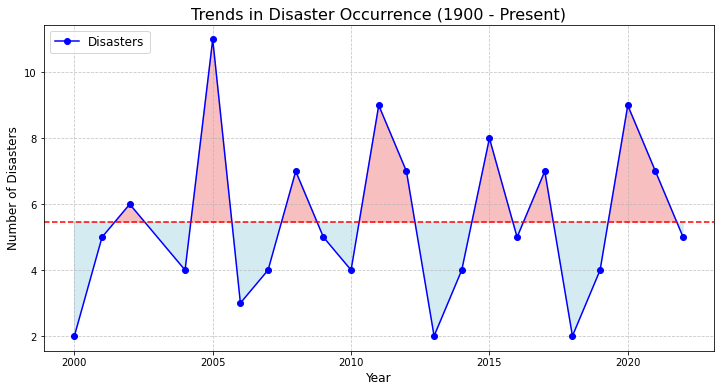

In [138]:
# Group the data by the 'Start Year' column and count the occurrences for each year
disaster_counts = data.groupby('Start Year')['Country'].count()

# Create a line plot to visualize the trends in disaster occurrence
plt.figure(figsize=(12, 6))
plt.plot(disaster_counts.index, disaster_counts.values, marker='o', linestyle='-', color='b', label='Disasters')
plt.title('Trends in Disaster Occurrence (1900 - Present)', fontsize=16)
plt.xlabel('Year', fontsize=12)
plt.ylabel('Number of Disasters', fontsize=12)
plt.grid(True, linestyle='--', alpha=0.7)
plt.legend(loc='upper left', fontsize=12)
plt.tick_params(axis='both', which='major', labelsize=10)
plt.axhline(y=disaster_counts.mean(), color='r', linestyle='--', label='Average')
plt.fill_between(disaster_counts.index, disaster_counts.values, disaster_counts.mean(), where=(disaster_counts.values > disaster_counts.mean()), interpolate=True, color='lightcoral', alpha=0.5)
plt.fill_between(disaster_counts.index, disaster_counts.values, disaster_counts.mean(), where=(disaster_counts.values <= disaster_counts.mean()), interpolate=True, color='lightblue', alpha=0.5)

# Show the plot
plt.show()


### Question 2: Which countries or subregions have experienced the highest number of mass disasters?

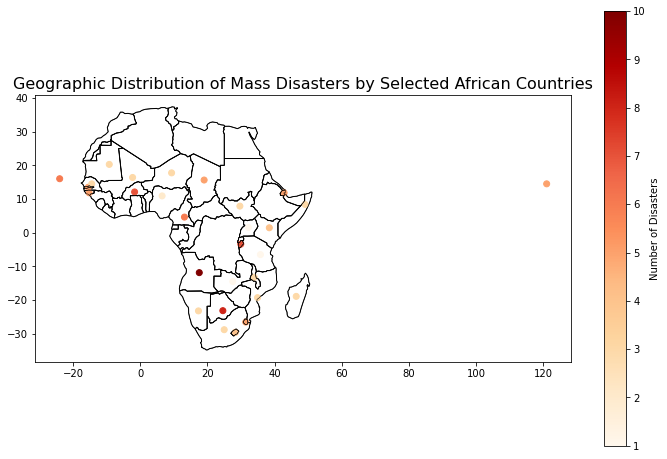

In [140]:
# Load the world map using geopandas
world = gpd.read_file(gpd.datasets.get_path('naturalearth_lowres'))

# Filter the world map to include only African countries
africa = world[world['continent'] == 'Africa']

# Specify the list of countries within Africa
selected_african_countries = [
    'Angola', 'Botswana', 'Burkina Faso', 'Burundi', 'Cabo Verde', 'Cameroon', 'Chad', 'Djibouti',
    'Eswatini', 'Ethiopia', 'Gambia', 'Guinea-Bissau', 'Kenya', 'Lesotho', 'Madagascar', 'Malawi',
    'Mali', 'Mauritania', 'Mozambique', 'Namibia', 'Niger', 'Senegal', 'Somalia', 'South Africa',
    'South Sudan', 'Sudan', 'Uganda', 'United Republic of Tanzania', 'Zambia', 'Zimbabwe'
]

# Filter the dataset to include only the selected African countries
data_selected_countries = data[data['Country'].isin(selected_african_countries)]

# Calculate the number of disasters by country
disasters_by_country = data_selected_countries['Country'].value_counts().reset_index()
disasters_by_country.columns = ['Country', 'Number of Disasters']

# Create a custom GeoDataFrame for the selected African countries
geometry = gpd.tools.geocode(selected_african_countries, provider='nominatim', user_agent="myGeocoder")
gdf = gpd.GeoDataFrame(disasters_by_country, geometry=geometry['geometry'])

# Create a choropleth map of Africa
fig, ax = plt.subplots(1, 1, figsize=(12, 8))
africa.boundary.plot(ax=ax, linewidth=0.5, color='k')
africa.plot(ax=ax, color='white', edgecolor='black')
gdf.boundary.plot(ax=ax, linewidth=0.5, color='k', linestyle='dotted')
gdf.plot(column='Number of Disasters', ax=ax, legend=True, cmap='OrRd', legend_kwds={'label': "Number of Disasters"})

# Set the title
plt.title('Geographic Distribution of Mass Disasters by Selected African Countries', fontsize=16)

# Show the map of Africa
plt.show()


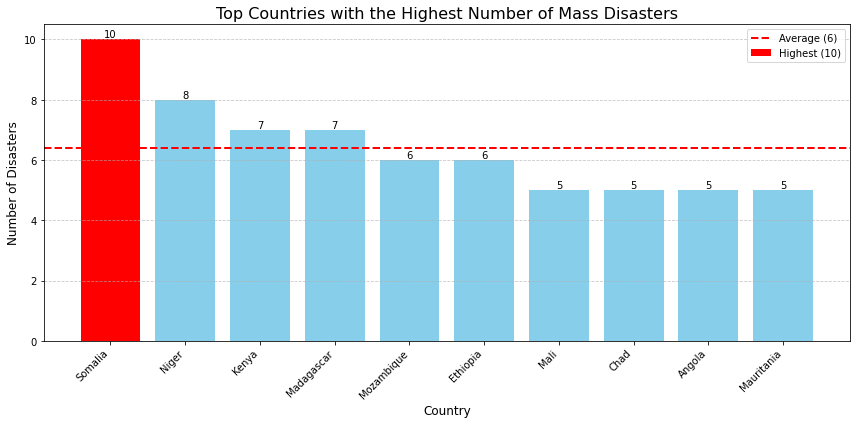

In [141]:
# Group the data by country and count the number of disasters in each country
disaster_counts = data['Country'].value_counts().reset_index()
disaster_counts.columns = ['Country', 'Number of Disasters']

# Select the top N countries with the highest number of disasters for visualization
top_countries = disaster_counts.head(10)  # You can adjust the number as needed

# Create a bar chart with enhanced styling
plt.figure(figsize=(12, 6))
bars = plt.bar(top_countries['Country'], top_countries['Number of Disasters'], color='skyblue')

# Add data labels on top of the bars
for bar in bars:
    yval = bar.get_height()
    plt.text(bar.get_x() + bar.get_width() / 2, yval, int(yval), ha='center', va='bottom', fontsize=10)

# Set a title, labels, and adjust the rotation of x-axis labels
plt.title('Top Countries with the Highest Number of Mass Disasters', fontsize=16)
plt.xlabel('Country', fontsize=12)
plt.ylabel('Number of Disasters', fontsize=12)
plt.xticks(rotation=45, ha='right', fontsize=10)

# Customize the grid lines
plt.grid(axis='y', linestyle='--', alpha=0.7)

# Add a horizontal line for the average number of disasters
average_disasters = top_countries['Number of Disasters'].mean()
plt.axhline(average_disasters, color='red', linestyle='--', label=f'Average ({int(average_disasters)})', linewidth=2)

# Highlight the country with the highest number of disasters
max_country = top_countries.iloc[0]['Country']
max_disasters = top_countries.iloc[0]['Number of Disasters']
plt.bar(max_country, max_disasters, color='red', label=f'Highest ({int(max_disasters)})')

# Add a legend
plt.legend()

# Show the chart
plt.tight_layout()
plt.show()


### Question 3: What are the most common types of mass disasters in the dataset?

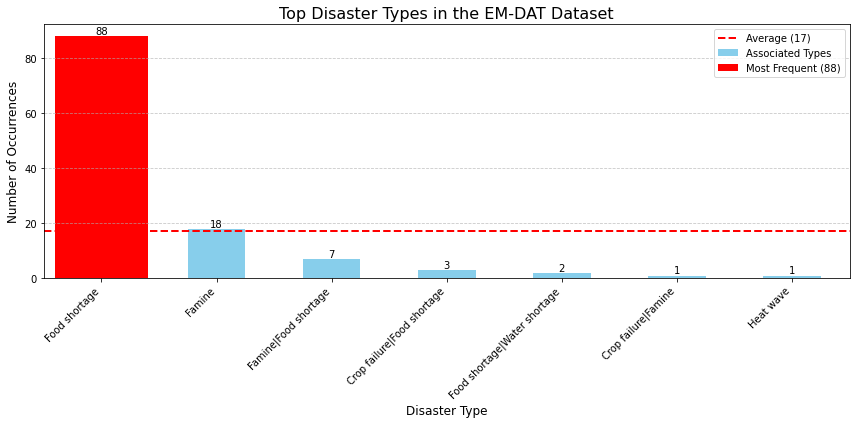

In [142]:
# Count the occurrences of each disaster type
disaster_type_counts = data['Associated Types'].value_counts()

# Select the top N disaster types to visualize (e.g., top 10)
top_disaster_types = disaster_type_counts.head(10)

# Create a bar chart with enhanced styling
plt.figure(figsize=(12, 6))
bars = top_disaster_types.plot(kind='bar', color='skyblue')

# Add data labels on top of the bars
for bar in bars.patches:
    yval = bar.get_height()
    plt.text(bar.get_x() + bar.get_width() / 2, yval, int(yval), ha='center', va='bottom', fontsize=10)

# Set a title, labels, and adjust the rotation of x-axis labels
plt.title('Top Disaster Types in the EM-DAT Dataset', fontsize=16)
plt.xlabel('Disaster Type', fontsize=12)
plt.ylabel('Number of Occurrences', fontsize=12)
plt.xticks(rotation=45, ha='right', fontsize=10)

# Customize the grid lines
plt.grid(axis='y', linestyle='--', alpha=0.7)

# Add a horizontal line for the average number of occurrences
average_occurrences = top_disaster_types.mean()
plt.axhline(average_occurrences, color='red', linestyle='--', label=f'Average ({int(average_occurrences)})', linewidth=2)

# Highlight the most frequent disaster type
max_disaster_type = top_disaster_types.idxmax()
max_occurrences = top_disaster_types.max()
plt.bar(max_disaster_type, max_occurrences, color='red', label=f'Most Frequent ({int(max_occurrences)})')

# Add a legend
plt.legend()

# Show the chart
plt.tight_layout()
plt.show()


### Question 4: How often do governments or organizations issue declarations in response to mass disasters?

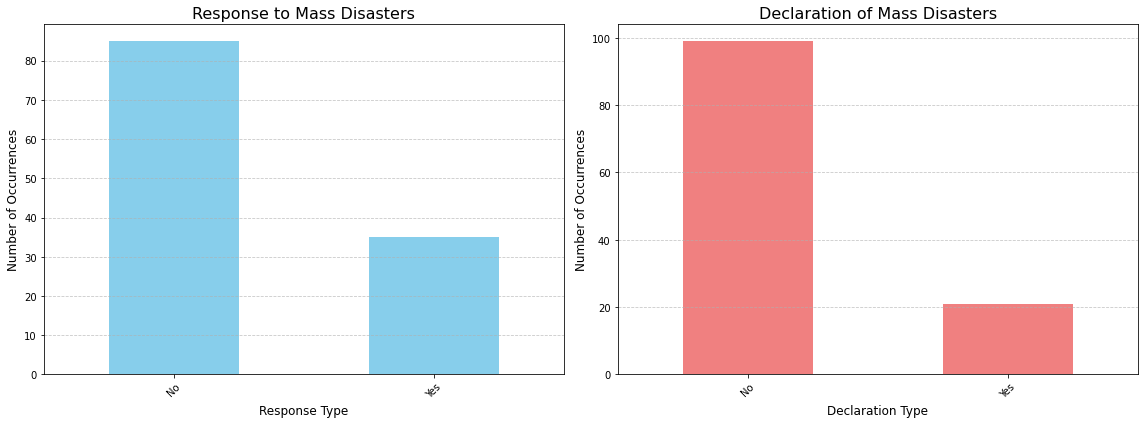

In [143]:
# Group the data by 'OFDA Response' and count the occurrences of different response types
response_counts = data['OFDA Response'].value_counts()

# Group the data by 'Declaration' and count the occurrences of different declaration types
declaration_counts = data['Declaration'].value_counts()

# Create subplots to display response and declaration data side by side
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(16, 6))

# Create a bar chart for response data
response_counts.plot(kind='bar', ax=ax1, color='skyblue')
ax1.set_title('Response to Mass Disasters', fontsize=16)
ax1.set_xlabel('Response Type', fontsize=12)
ax1.set_ylabel('Number of Occurrences', fontsize=12)
ax1.tick_params(axis='x', rotation=45, labelsize=10)
ax1.grid(axis='y', linestyle='--', alpha=0.7)

# Create a bar chart for declaration data
declaration_counts.plot(kind='bar', ax=ax2, color='lightcoral')
ax2.set_title('Declaration of Mass Disasters', fontsize=16)
ax2.set_xlabel('Declaration Type', fontsize=12)
ax2.set_ylabel('Number of Occurrences', fontsize=12)
ax2.tick_params(axis='x', rotation=45, labelsize=10)
ax2.grid(axis='y', linestyle='--', alpha=0.7)

# Adjust spacing between subplots
plt.tight_layout()

# Show the charts
plt.show()


### Question 5
- How long, on average, do mass disasters last (start and end dates)?
- Is there a seasonality pattern in the occurrence of disasters (e.g., more in certain months)?

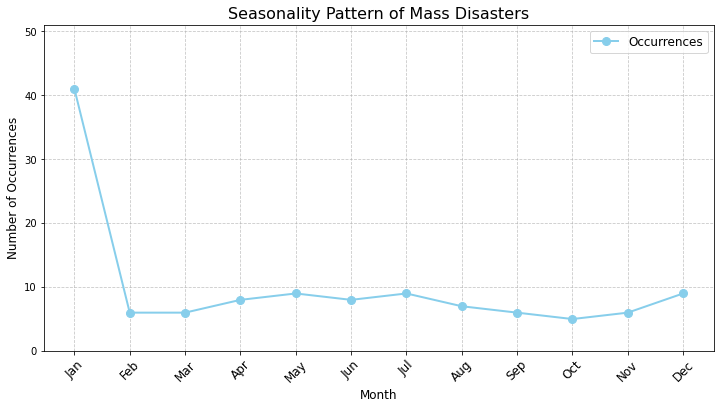

Average Duration of Mass Disasters: 316.54 days


In [144]:
# Convert 'Start Year' to string
data['Start Year'] = data['Start Year'].astype(str)

# Pad 'Start Month' with leading zeros to ensure it's a two-digit string
data['Start Month'] = data['Start Month'].astype(int).apply(lambda x: f'{x:02}')

# Combine 'Start Year' and 'Start Month' as strings to create a 'Start Date' column
data['Start Date'] = data['Start Year'] + '-' + data['Start Month'] + '-01'

# Convert the 'Start Date' column to datetime
data['Start Date'] = pd.to_datetime(data['Start Date'], format='%Y-%m-%d')

# Assuming 'End Year' and 'End Month' are also strings, create 'End Date' in the same way
data['End Year'] = data['End Year'].astype(str)

# Pad 'End Month' with leading zeros
data['End Month'] = data['Start Month']

data['End Date'] = data['End Year'] + '-' + data['End Month'] + '-01'

# Convert the 'End Date' column to datetime
data['End Date'] = pd.to_datetime(data['End Date'], format='%Y-%m-%d')

# Calculate the duration of each disaster
data['Duration'] = (data['End Date'] - data['Start Date']).dt.days

# Calculate the average duration of mass disasters
average_duration = data['Duration'].mean()

# Group the data by month and count the occurrences of disasters in each month
disasters_by_month = data['Start Date'].dt.month.value_counts().sort_index()

# Create a line chart to visualize the seasonality pattern with enhanced styling
plt.figure(figsize=(12, 6))
plt.plot(disasters_by_month.index, disasters_by_month.values, marker='o', linestyle='-', color='skyblue', linewidth=2, markersize=8)
plt.title('Seasonality Pattern of Mass Disasters', fontsize=16)
plt.xlabel('Month', fontsize=12)
plt.ylabel('Number of Occurrences', fontsize=12)
plt.grid(True, linestyle='--', alpha=0.7)

# Customize the x-axis labels to show month names
month_labels = ['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun', 'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec']
plt.xticks(range(1, 13), month_labels, rotation=45, fontsize=12)

# Add a legend, a grid, and adjust the y-axis limits
plt.legend(['Occurrences'], loc='upper right', fontsize=12)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.ylim(0, max(disasters_by_month.values) + 10)

# Show the chart
plt.show()

print(f"Average Duration of Mass Disasters: {average_duration:.2f} days")


### Question 6
   - How does the total number of affected people vary across different disasters and regions?
   - Can you identify any outliers with a significantly higher number of affected individuals?
### 1. Bar Chart

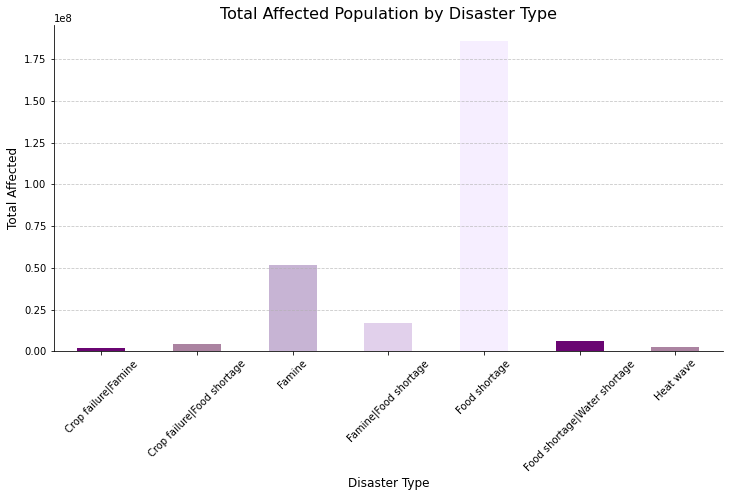

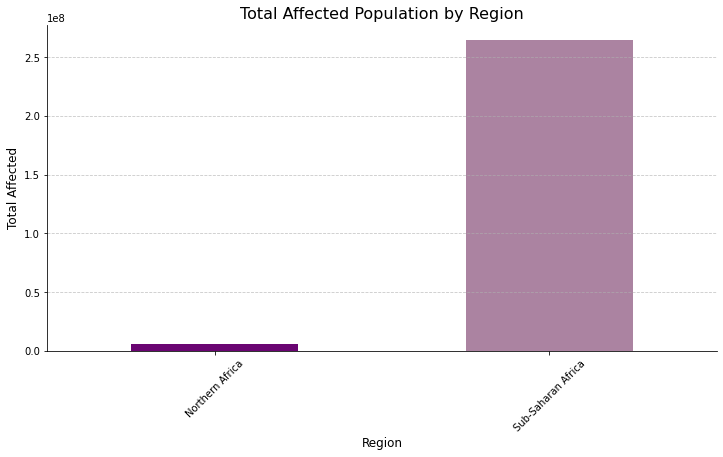

In [145]:
# Filter out rows with missing 'Total Affected' data
data = data.dropna(subset=['Total Affected'])

# Set a custom color palette
custom_palette = ['#6A0572', '#AB83A1', '#C7B4D4', '#E1D0EB', '#F6EEFF']

# Create a bar chart to visualize the total number of affected people by disaster type
plt.figure(figsize=(12, 6))
ax = data.groupby('Associated Types')['Total Affected'].sum().plot(kind='bar', color=custom_palette)
ax.set_title('Total Affected Population by Disaster Type', fontsize=16)
ax.set_xlabel('Disaster Type', fontsize=12)
ax.set_ylabel('Total Affected', fontsize=12)
ax.tick_params(axis='x', rotation=45, labelsize=10)

# Add grid lines and remove the top and right spines
ax.grid(axis='y', linestyle='--', alpha=0.7)
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)

# Show the chart
plt.show()

# Create a bar chart to visualize the total number of affected people by region
plt.figure(figsize=(12, 6))
ax = data.groupby('Subregion')['Total Affected'].sum().plot(kind='bar', color=custom_palette)
ax.set_title('Total Affected Population by Region', fontsize=16)
ax.set_xlabel('Region', fontsize=12)
ax.set_ylabel('Total Affected', fontsize=12)
ax.tick_params(axis='x', rotation=45, labelsize=10)

# Add grid lines and remove the top and right spines
ax.grid(axis='y', linestyle='--', alpha=0.7)
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)

# Show the chart
plt.show()


### 2. Scatter Plot

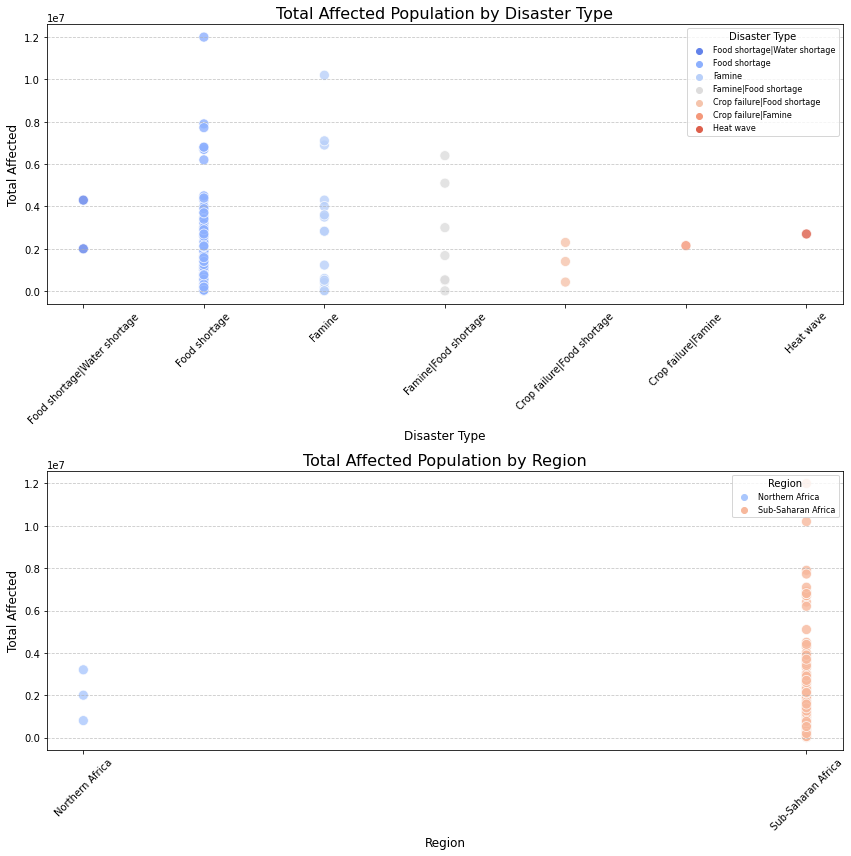

In [146]:
# Filter out rows with missing 'Total Affected' data
data = data.dropna(subset=['Total Affected'])

# Set a Seaborn color palette
seaborn_palette = "coolwarm"  # You can choose from various Seaborn palettes

# Create a figure with subplots
fig, axes = plt.subplots(nrows=2, ncols=1, figsize=(12, 12))

# Create a scatter plot to visualize the total number of affected people by disaster type
sns.scatterplot(data=data, x='Associated Types', y='Total Affected', hue='Associated Types', palette=seaborn_palette, ax=axes[0], s=100, alpha=0.8)
axes[0].set_title('Total Affected Population by Disaster Type', fontsize=16)
axes[0].set_xlabel('Disaster Type', fontsize=12)
axes[0].set_ylabel('Total Affected', fontsize=12)
axes[0].grid(axis='y', linestyle='--', alpha=0.7)
axes[0].tick_params(axis='x', rotation=45, labelsize=10)
axes[0].legend(title='Disaster Type', loc='upper right', title_fontsize=10, fontsize=8)

# Create a scatter plot to visualize the total number of affected people by region
sns.scatterplot(data=data, x='Subregion', y='Total Affected', hue='Subregion', palette=seaborn_palette, ax=axes[1], s=100, alpha=0.8)
axes[1].set_title('Total Affected Population by Region', fontsize=16)
axes[1].set_xlabel('Region', fontsize=12)
axes[1].set_ylabel('Total Affected', fontsize=12)
axes[1].grid(axis='y', linestyle='--', alpha=0.7)
axes[1].tick_params(axis='x', rotation=45, labelsize=10)
axes[1].legend(title='Region', loc='upper right', title_fontsize=10, fontsize=8)

# Adjust the layout of the subplots
plt.tight_layout()

# Show the plots
plt.show()


### Question 7
   - Is there any correlation between the occurrence of disasters and the Consumer Price Index (CPI)?
   - How does the CPI change in response to specific types of disasters?


Correlation between Duration of Disasters and CPI: 0.04


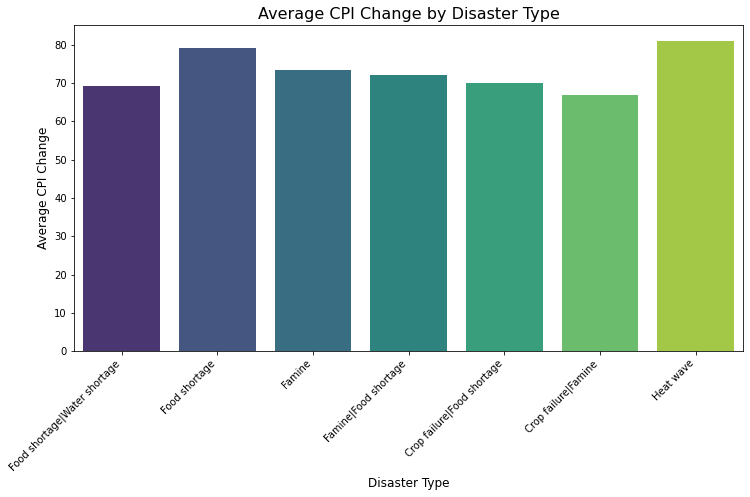

In [147]:
# Data preprocessing
# Convert 'Start Year' and 'End Year' to datetime
data['Start Year'] = pd.to_datetime(data['Start Year'], format='%Y')
data['End Year'] = pd.to_datetime(data['End Year'], format='%Y')

# Calculate the duration of each disaster in years
data['Duration (Years)'] = (data['End Year'] - data['Start Year']).dt.days / 365

# Filter out rows with missing 'CPI' data
data = data.dropna(subset=['CPI'])

# Calculate the correlation between the duration of disasters and CPI
correlation = data['Duration (Years)'].corr(data['CPI'])

# Print the correlation coefficient
print(f"Correlation between Duration of Disasters and CPI: {correlation:.2f}")

# Create a bar chart to visualize the average CPI change by disaster type
plt.figure(figsize=(12, 6))
sns.barplot(data=data, x='Associated Types', y='CPI', ci=None, palette="viridis")
plt.title('Average CPI Change by Disaster Type', fontsize=16)
plt.xlabel('Disaster Type', fontsize=12)
plt.ylabel('Average CPI Change', fontsize=12)
plt.xticks(rotation=45, ha='right', fontsize=10)

# Show the chart
plt.show()


### Question 8: Are there 3D relationships between variables (Year, CPI, and Total Affected) that can be visualized to gain deeper insights?

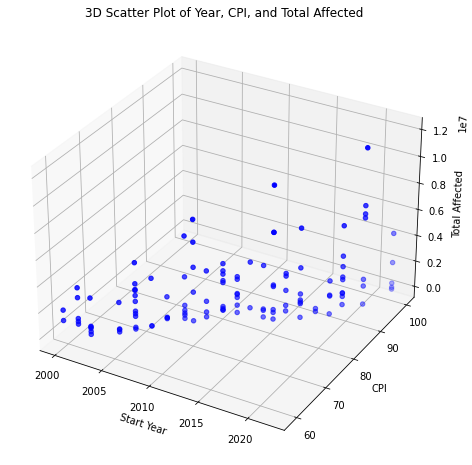

In [148]:
# Assuming 'Start Year' is in date format, convert it to the year
data['Start Year'] = data['Start Year'].dt.year

# Create a 3D scatter plot with the updated 'Start Year'
fig = plt.figure(figsize=(10, 8))
ax = fig.add_subplot(111, projection='3d')

# Sample data (replace with your dataset)
x = data['Start Year']
y = data['CPI']
z = data['Total Affected']

ax.scatter(x, y, z, c='b', marker='o')

ax.set_xlabel('Start Year')
ax.set_ylabel('CPI')
ax.set_zlabel('Total Affected')

plt.title('3D Scatter Plot of Year, CPI, and Total Affected')
plt.show()
